# CS446/519 - Class Session 12 - Pagerank/Katz/Eigenvector centrality

In this class session we are going to obtain the outgoing-edge PageRank centrality of each gene (vertex) in a gene regulatory network mapped by DNase I hypersensitive site footprinting (Neph et al., Cell, volume 150, pages 1274-1286, 2012; see PDF on Canvas)

Using `read.table`, read the file `shared/neph_gene_network.txt`, which has two columns of text (first column is the regulator gene, second column is the target gene), into a data frame. The file has no header and is tab-delimited.  Assign the column names of the dataframe to be `regulator` and `target`, respectively.

In [4]:
edge_list_neph <- read.table("shared/neph_gene_network.txt",
                            header=FALSE,
                            sep="\t",
                            stringsAsFactors=FALSE,
                            col.names=c("regulator","target"))

Load the edge-list data into a directed Graph object in igraph, using `graph_from_data_frame`. *Make sure to reverse the columns of the data frame when you input the data frame into `graph_from_data_frame` since we want the outgoing pagerank centrality not incoming pagerank centrality.* Print out a summary of the graph. 

In [5]:
library(igraph)
neph_graph <- graph_from_data_frame(edge_list_neph[,c(2,1)], directed=TRUE)
summary(neph_graph)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



IGRAPH DN-- 538 47945 -- 
+ attr: name (v/c)


Compute the pagerank centrality measures of all vertices, using `page_rank`.

In [6]:
pageranks <- page_rank(neph_graph)

Which vertex has highest pagerank centrality in the gene regulatory network, and what is its pagerank centrality value? (think `which.max`).  Note:  you want the `vector` slot of the object returned from `page_rank`.

In [7]:
which.max(pageranks$vector)

FOS 
119

Calculate the in-degree of all vertices in the graph, and scatter plot `log(degree)` vs. `log(pagerank)`.  (Do you see why we used `in` here?  Note the column swapping we did earlier)

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"2 x values <= 0 omitted from logarithmic plot"

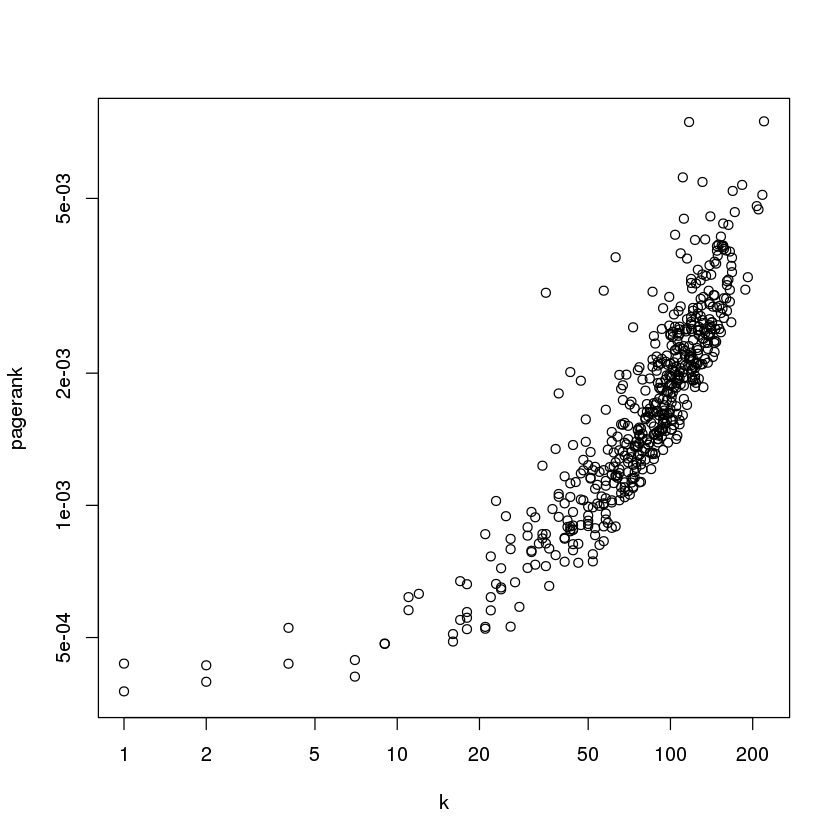

In [8]:
plot(degree(neph_graph, 
            mode="in"), 
     pageranks$vector, 
     xlab=expression(k), 
     ylab="pagerank", 
     log="xy")

In [9]:
which.max(degree(neph_graph, mode="in"))

FOS 
119